<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/Term_project_3_2_almost_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import random, numpy
from numpy.random import seed

SEED = 12345

In [68]:
df = pd.read_excel('Data for NN SP500.xlsx')
df.index = pd.to_datetime(df.Date)
df.drop(['Date'], axis='columns', inplace=True)
# df.head()

In [40]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.7, random_state=42, shuffle=False)

In [41]:
# X_train.tail()
# X_valid.head()
# y_train
# y_valid
input_shape = [X_train.shape[1]]
# input_shape

0.535820484161377


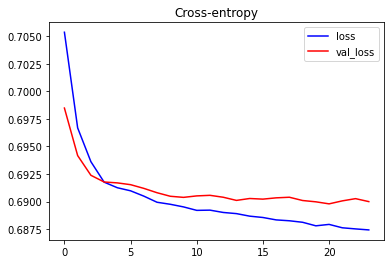

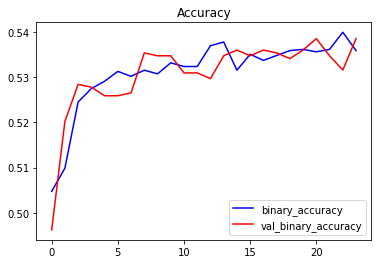

In [61]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

seed(SEED)
tensorflow.random.set_seed(SEED)
random.seed(SEED)
numpy.random.seed(SEED)

model = keras.Sequential([
    # layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    # layers.Dropout(rate=0.2),
    layers.Dense(16, activation='relu'),
    # layers.Dropout(rate=0.2),    
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=25,
    verbose=0,
    callbacks=[early_stopping]
)

print(history.history['binary_accuracy'][-1])

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", colormap='bwr')
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy", colormap='bwr')

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [62]:
model.predict(X_valid, verbose=1)

50/50 [==============================] - 0s 840us/step


array([[0.5184862 ],
       [0.52027047],
       [0.53601366],
       ...,
       [0.51998186],
       [0.51692593],
       [0.51977533]], dtype=float32)

In [64]:
predicted = pd.DataFrame(model.predict(X_valid, verbose=1))

50/50 [==============================] - 0s 904us/step


In [65]:
predicted

,0
0,0.518486
1,0.520270
2,0.536014
3,0.578526
4,0.513689
...,...
1581,0.519525
1582,0.518597
1583,0.519982
1584,0.516926


In [69]:
predicted.to_excel('d:\Курсова\Курсова 2021\Data for NN SP500.xlsx')